# Decision Trees - Class Exercise 1

## Introduction

Cardiovascular diseases (CVDs) are the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.

We will use the Heart Failure dataset for this exercise, as heart failure is a common event caused by CVDs. This dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Our goal is to build a decision tree a model to predict mortality caused by Heart Failure.

## Metadata (Data Dictionary)

| Variables               | Description                                                |
|-------------------------|------------------------------------------------------------|
| age                     | Age of patient (years)                                     |
| anaemia                 | Low count of red blood cells or haemoglobin (1 = yes, 0 = no) |
| creatinine_phosphokinase| Level of the CPK enzyme in the blood (mcg/L)               |
| diabetes                | Whether the patient has diabetes (1 = yes, 0 = no)         |
| ejection_fraction       | Percent of blood leaving the heart at each contraction (%) |
| high_blood_pressure     | Whether the patient has hypertension (1 = yes, 0 = no)     |
| platelets               | Platelets in the blood (kiloplatelets/mL)                  |
| serum_creatinine        | Level of serum creatinine in the blood (mg/dL)             |
| serum_sodium            | Level of serum sodium in the blood (mEq/L)                 |
| sex                     | Gender of patient (1 = male, 0 = female)                   |
| smoking                 | Whether the patient smokes or not (1 = yes, 0 = no)        |
| DEATH_EVENT             | Whether the patient died during the follow-up period (1 = dead, 0 = alive) |


## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Import data

In [2]:
df = pd.read_csv('Heart Failure.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


## Check for missing values

In [3]:
missing_values = df.isnull().sum()
missing_values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

We observe that there are no missing values in the dataset.

## Train-test split

In [4]:
label = 'DEATH_EVENT'
excluded_columns = [label]
features = [feature for feature in list(df) if feature not in excluded_columns]

In [5]:
X = df[features]
y = df[label]

In [6]:
# Specify split parameters
random_seed = 9002
test_size = 0.2

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

In [7]:
print('Size of train set: ', len(X_train))
print('Size of test set: ', len(X_test))

Size of train set:  239
Size of test set:  60


## Train model

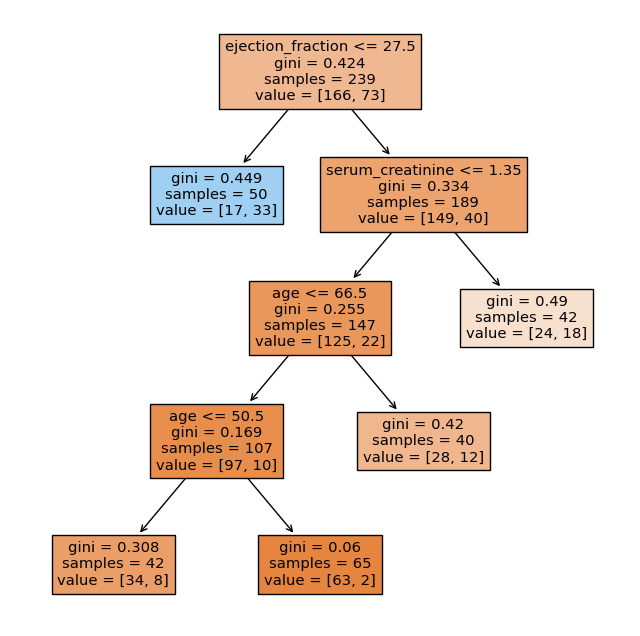

In [8]:
# Specify model parameters
criterion = 'gini'
min_samples_leaf = 40

# Build model
model = DecisionTreeClassifier(criterion=criterion, min_samples_leaf=min_samples_leaf)

# Fit model on training data
model.fit(X_train, y_train)

# Visualize the decision tree
feature_names = X_train.columns.tolist()
plt.figure(figsize=(8, 8))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

## Evaluate Model

In [9]:
# Predict test data
y_pred = model.predict(X_test)

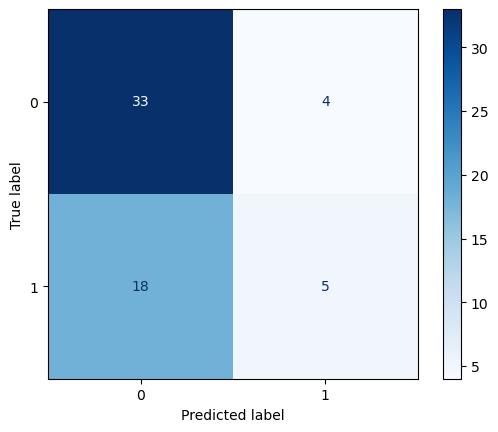

In [10]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [11]:
# Check test accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy_test:.2f}")

Test accuracy: 0.63


## Model Improvement

To improve the model, we will experiment with two hyperparameters:
* ```criterion```
* ```min_samples_leaf```

We will first define the hyperparameter grid for ```criterion``` and ```min_samples_leaf```, which contains values for these two hyperparameters that we will be experimenting with. Then, we will use ```GridSearchCV``` to perform a grid search to obtain the optimal values of the two hyperparameters.

In [12]:
# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80]
}

In [13]:
# Perform grid search with 10-fold cross-validation
model = DecisionTreeClassifier()
cv = KFold(n_splits=10, shuffle=True, random_state=9002)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train);

In [14]:
# Display best params and best validation score
print("Best parameters:", grid_search.best_params_)
print(f"Best average cross-validation score: {grid_search.best_score_:.2f}")

Best parameters: {'criterion': 'entropy', 'min_samples_leaf': 10}
Best average cross-validation score: 0.75


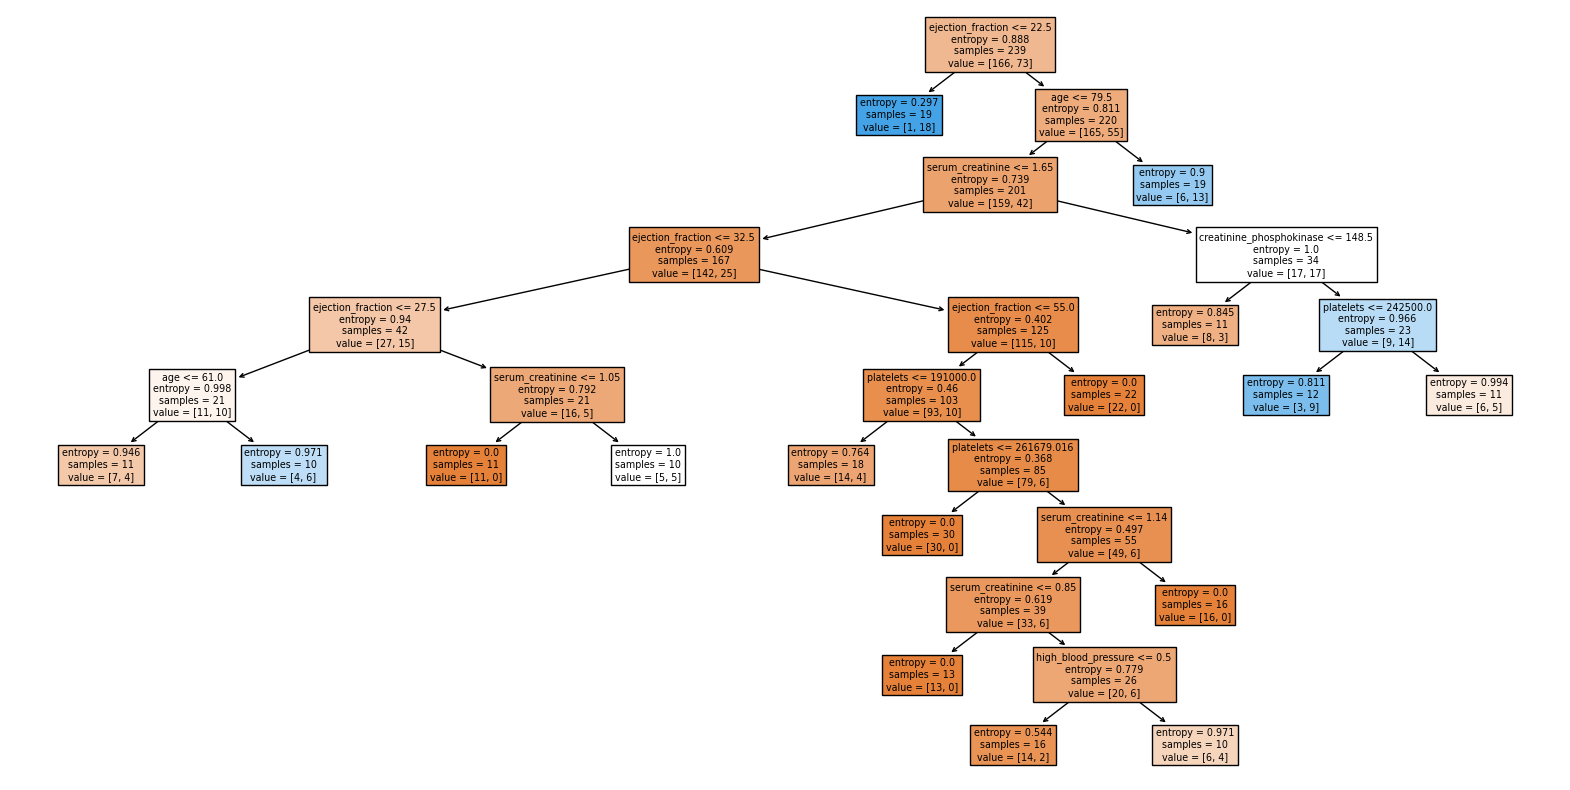

In [15]:
# Fit optimal model using best params found above
optimal_model = grid_search.best_estimator_

# Visualize the optimal decision tree
plt.figure(figsize=(20, 10))
plot_tree(optimal_model, filled=True, feature_names=feature_names)
plt.show()

In [16]:
# Apply the optimal model on the test data
y_test_pred = optimal_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.2f}")

Test accuracy: 0.70


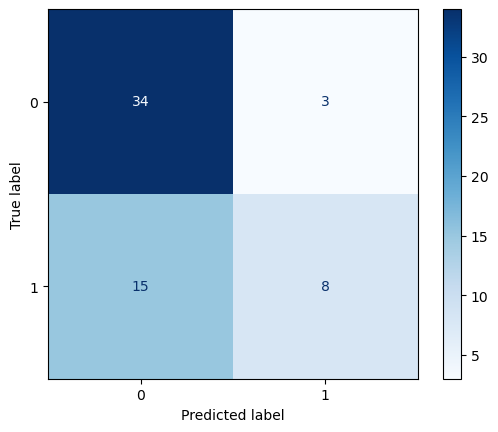

In [17]:
# Generate confusion matrix for optimal model
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()